# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips[0:5]

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  net_bill
          0            1             1               1     15.98
          1            0             1               1      8.68
          1            0             1               1     17.51
          1            0             1               1     20.37
          0            1             1               1     20.98
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [4]:
y

DesignMatrix with shape (5, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  Terms:
    'tip' (column 0)

In [5]:
reg = smf.ols('tip ~ sex + smoker + time + net_bill', data=tips).fit()
tips['res_log'] = reg.resid

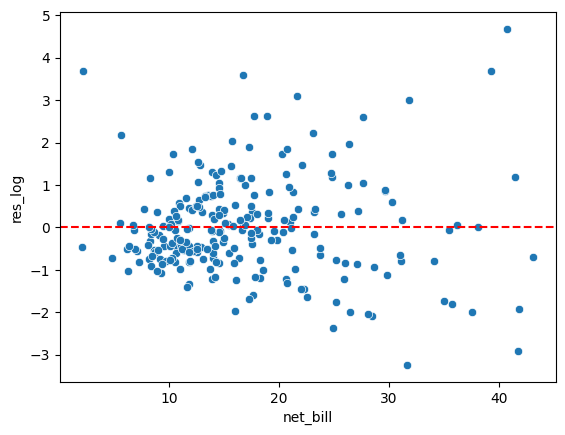

In [6]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

#### Transformando net_bill em log e polinômio

In [7]:
# log
y, X = patsy.dmatrices('tip ~ sex + smoker + time + np.log(net_bill) + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  np.log(net_bill)
          0            1             1               1           2.77134
          1            0             1               1           2.16102
          1            0             1               1           2.86277
          1            0             1               1           3.01406
          0            1             1               1           3.04357
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'time' (column 3)
    'np.log(net_bill)' (column 4)

In [8]:
y

DesignMatrix with shape (5, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  Terms:
    'tip' (column 0)

In [9]:
reg = smf.ols('tip ~ sex + smoker + time + np.log(net_bill)', data=tips).fit()
tips['res_log'] = reg.resid

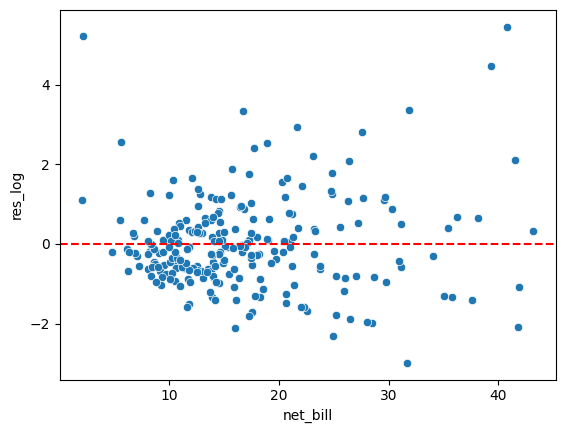

In [10]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [11]:
# polinômio
y, X = patsy.dmatrices('tip ~ sex + smoker + time + np.power(net_bill, 2) + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  np.power(net_bill, 2)
          0            1             1               1               255.3604
          1            0             1               1                75.3424
          1            0             1               1               306.6001
          1            0             1               1               414.9369
          0            1             1               1               440.1604
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'time' (column 3)
    'np.power(net_bill, 2)' (column 4)

In [12]:
y

DesignMatrix with shape (5, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  Terms:
    'tip' (column 0)

In [13]:
reg = smf.ols('tip ~ sex + smoker + time + np.power(net_bill, 2)', data=tips).fit()
tips['res_log'] = reg.resid

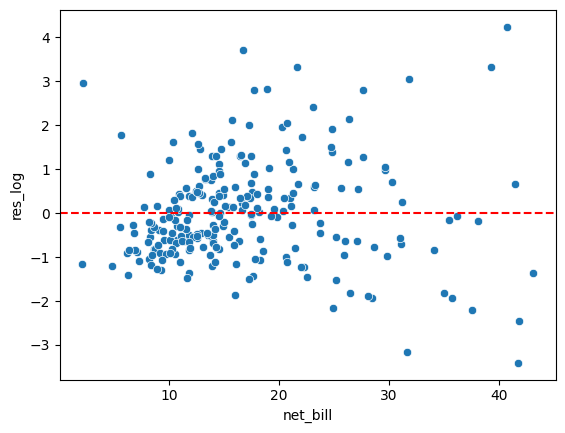

In [14]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [15]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  net_bill
          0            1             1               1     15.98
          1            0             1               1      8.68
          1            0             1               1     17.51
          1            0             1               1     20.37
          0            1             1               1     20.98
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [16]:
y

DesignMatrix with shape (5, 1)
  np.log(tip)
      0.00995
      0.50682
      1.25276
      1.19695
      1.28371
  Terms:
    'np.log(tip)' (column 0)

In [17]:
reg = smf.ols('np.log(tip) ~ sex + smoker + time + net_bill', data=tips).fit()
tips['res_log'] = reg.resid

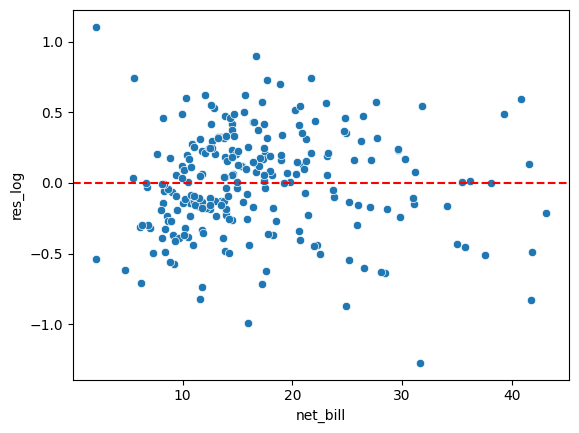

In [18]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [19]:
reg.rsquared

0.3132389303427351

In [20]:
# log
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + np.log(net_bill) + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  np.log(net_bill)
          0            1             1               1           2.77134
          1            0             1               1           2.16102
          1            0             1               1           2.86277
          1            0             1               1           3.01406
          0            1             1               1           3.04357
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'time' (column 3)
    'np.log(net_bill)' (column 4)

In [21]:
y

DesignMatrix with shape (5, 1)
  np.log(tip)
      0.00995
      0.50682
      1.25276
      1.19695
      1.28371
  Terms:
    'np.log(tip)' (column 0)

In [22]:
reg = smf.ols('np.log(tip) ~ sex + smoker + time + np.log(net_bill)', data=tips).fit()
tips['res_log'] = reg.resid

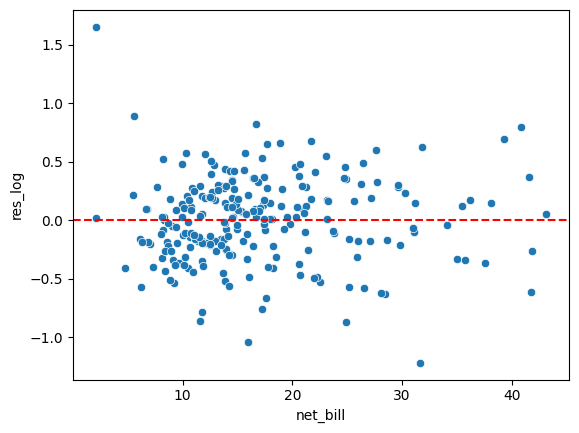

In [23]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [24]:
reg.rsquared

0.3199911749998886

In [25]:
# polinômio
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + np.power(net_bill, 2) + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  np.power(net_bill, 2)
          0            1             1               1               255.3604
          1            0             1               1                75.3424
          1            0             1               1               306.6001
          1            0             1               1               414.9369
          0            1             1               1               440.1604
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'time' (column 3)
    'np.power(net_bill, 2)' (column 4)

In [26]:
reg = smf.ols('np.log(tip) ~ sex + smoker + time + np.power(net_bill, 2)', data=tips).fit()
tips['res_log'] = reg.resid

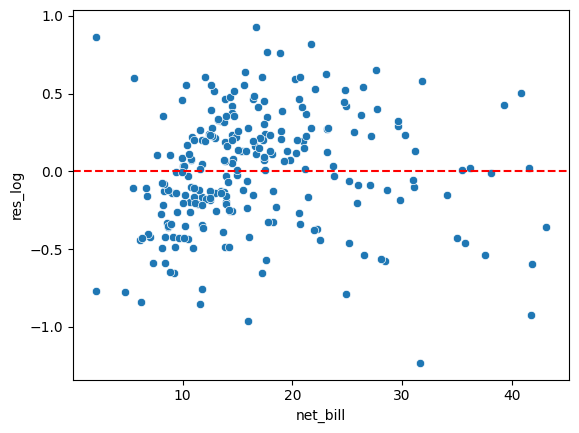

In [27]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [28]:
reg = smf.ols('tip ~ sex + smoker + time + np.power(net_bill, 2)', data=tips).fit()
tips['res_log'] = reg.resid

In [29]:
reg.rsquared

0.3055843119278244

In [30]:
## O modelo do item 1 possui um melhor coeficiente

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [35]:
previsao_de_renda = pd.read_csv('/content/previsao_de_renda.csv', index_col=[0])
previsao_de_renda[0:5]

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [36]:
reg = smf.ols('renda ~ tempo_emprego', data=previsao_de_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:08:01   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

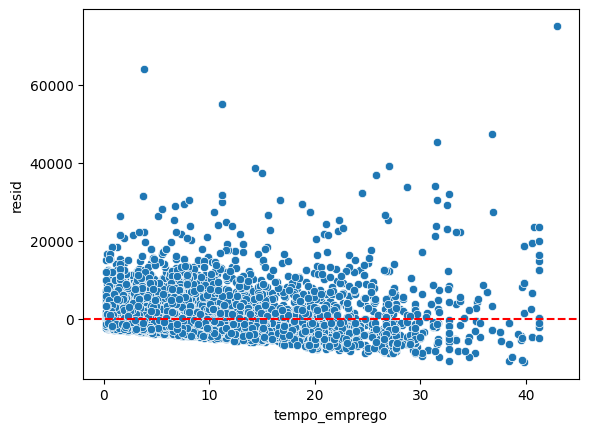

In [37]:
previsao_de_renda['resid'] = reg.resid
sns.scatterplot(x = 'tempo_emprego', y = 'resid', data = previsao_de_renda)
plt.axhline(y=0, color='r', linestyle='--')

In [39]:
# regressão multipla
reg = smf.ols('np.log(renda) ~ posse_de_veiculo +	posse_de_imovel + qtd_filhos + 	tipo_renda	+ educacao +	estado_civil +	tipo_residencia +	idade +	tempo_emprego +	qt_pessoas_residencia', data=previsao_de_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     112.9
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:08:39   Log-Likelihood:                -13748.
No. Observations:               12466   AIC:                         2.754e+04
Df Residuals:                   12442   BIC:                         2.772e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.6618      0.283     27.028      0.000       7.106       8.217
posse_de_veiculo[T.True]             0.1502      0.014     11.070      0.000       0.124       0.177
posse_de_imovel[T.True]              0.0735      0.014      5.201      0.000       0.046       0.101
tipo_renda[T.Bolsista]              -0.1252      0.365     -0.343      0.732      -0.841       0.591
tipo_renda[T.Empresário]             0.1611      0.015     10.556      0.000       0.131       0.191
tipo_renda[T.Pensionista]            0.3461      0.244      1.421      0.155      -0.131       0.824
tipo_renda[T.Servidor público]       0.0585      0.022      2.647      0.008       0.015       0.102
educacao[T.Pós graduação]            0.3572      0.183      1.951      0.051      -0.002       0.716
educacao[T.Secundário]              -0.0505      0.074     -0.681      0.496      -0.196       0.095
educacao[T.Superior completo]        0.0194      0.074      0.261      0.794      -0.127       0.165
educacao[T.Superior incompleto]     -0.0933      0.080     -1.170      0.242      -0.250       0.063
estado_civil[T.Separado]            -0.1337      0.137     -0.979      0.328      -0.401       0.134
estado_civil[T.Solteiro]            -0.0342      0.134     -0.255      0.799      -0.297       0.229
estado_civil[T.União]               -0.0745      0.024     -3.063      0.002      -0.122      -0.027
estado_civil[T.Viúvo]               -0.1943      0.140     -1.386      0.166      -0.469       0.081
tipo_residencia[T.Casa]             -0.0599      0.056     -1.076      0.282      -0.169       0.049
tipo_residencia[T.Com os pais]      -0.1355      0.062     -2.172      0.030      -0.258      -0.013
tipo_residencia[T.Comunitário]       0.0124      0.107      0.116      0.908      -0.198       0.223
tipo_residencia[T.Estúdio]          -0.0233      0.093     -0.251      0.802      -0.205       0.158
tipo_residencia[T.Governamental]    -0.1500      0.067     -2.230      0.026      -0.282      -0.018
qtd_filhos                           0.0577      0.134      0.432      0.666      -0.204       0.320
idade                                0.0035      0.001      4.314      0.000       0.002       0.005
tempo_emprego                        0.0452      0.001     43.625      0.000       0.043       0.047
qt_pessoas_residencia               -0.0332      0.134     -0.249      0.804      -0.295       0.229
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.385
Skew:                           0.019   Prob(JB):                        0.500
Kurtosis:                       3.035   

In [40]:
reg = smf.ols('np.log(renda) ~ posse_de_veiculo +	posse_de_imovel +	idade +	tempo_emprego', data=previsao_de_renda).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     586.6
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:10:11   Log-Likelihood:                -13854.
No. Observations:               12466   AIC:                         2.772e+04
Df Residuals:                   12461   BIC:                         2.775e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.5800      0.031    242.628      0.000       7.519       7.641
posse_de_veiculo[T.True]     0.1698      0.013     12.653      0.000       0.144       0.196
posse_de_imovel[T.True]      0.0912      0.014      6.572      0.000       0.064       0.118
idade                        0.0024      0.001      3.161      0.002       0.001       0.004
tempo_emprego                0.0449      0.001     43.619      0.000       0.043       0.047
==============================================================================
Omnibus:                        4.288   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.255
Skew:                           0.043   Prob(JB):                        0.119
Kurtosis:                       3.030   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

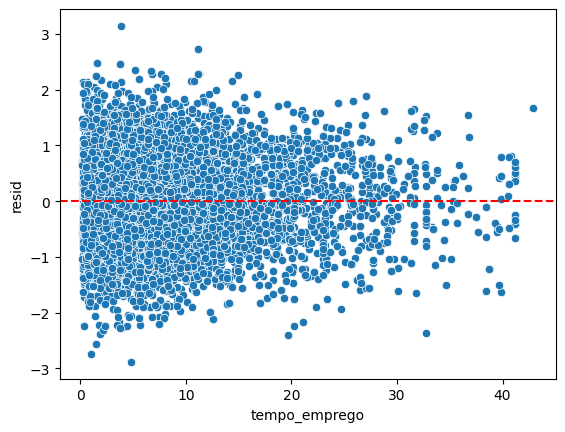

In [42]:
previsao_de_renda['resid'] = reg.resid
sns.scatterplot(x = 'tempo_emprego', y = 'resid', data = previsao_de_renda)
plt.axhline(y=0, color='r', linestyle='--')